# Adding J2 to Phoebe

In Phoebe (https://www.phoebe-project.org/), it is necessary to model stellar systems, which are massive, compact, and with rotating components. Generally, this problem is too complex, because each star is distorted by a Roche-like potential (Horvath et al. 2020). Nevertheless, a useful approximation might be that each star is described by oblateness (J2), which acts preferentially on the closest components. Each pair of stars is thus assumed to have the rotatonal axes perpendicular to the orbital plane (e.g., Fabrycky 2010). To this point, one can use an alternative implementation of the J2 force shown here.

Let's start with a standard setup:

In [1]:
import rebound
sim = rebound.Simulation()
sim.add(m = 1.)
sim.add(m = 3.e-6, a = 1., e = 0.01)
sim.move_to_com()

Add the J2 force:

In [2]:
import reboundx
rebx = reboundx.Extras(sim)
j2 = rebx.load_force("j2")
rebx.add_force(j2)

And the respective J2 value (unitless) and equatorial radius (au):

In [3]:
sim.particles[0].params["J2"] = 0.01
sim.particles[0].params["R_eq"] = 1/200.

We integrate as normal:

In [6]:
import numpy as np

times = np.linspace(0, 1.e4, 1000)
pomegas = np.zeros(len(times))

for i, time in enumerate(times):
    sim.integrate(time)
    pomegas[i] = sim.particles[1].pomega

print("pomega = {0}".format(pomegas[-1]))

pomega = 0.001246349474638658


Finally, let's plot the corresponding precession of omega:

Text(0, 0.5, 'pomegas [rad]')

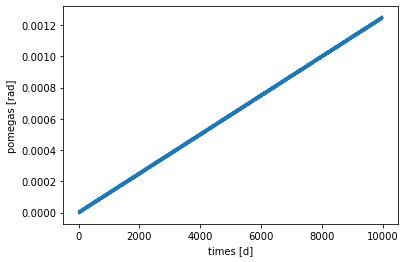

In [7]:
import matplotlib.pyplot as plt

plt.plot(times, pomegas)
plt.xlabel("times [d]")
plt.ylabel("pomegas [rad]")